In [1]:
from utils.polycasebuilder import generate_random_prob, generate_random_polynomials
from graph.operators import eqv_to_edges_tree, reformulate, dsm_reformulate
from graph.matrixview import render_incidence, incidence_artifacts
from modeling.transformations import transform_components
from solver.runpipeline import run_valid_formulation
from solver.postprocess import print_vars_in_order
from graph.graphutils import default_nodetyperepr
import numpy as np
import pandas as pd

# Generate variable incidence

In [2]:
#seed 10 is nice, sparasity 1.7
n_eqs, n_vars, seed, sparsity = 10, 13, 8, 1.1
eq_incidence, var_incidence, outset = generate_random_prob(n_eqs, n_vars, seed, sparsity)

In [3]:
edges,tree,_ = eqv_to_edges_tree(eq_incidence, outset, n_eqs=n_eqs)
formulation_scc = dsm_reformulate(edges, tree, outset)

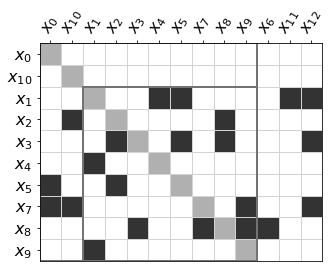

In [4]:
render_incidence(*formulation_scc, dsm=True);

# Generate polynomials 

In [5]:
rng = np.random.default_rng(12345)
polynomials, var_mapping, edges, tree, comps = generate_random_polynomials(eq_incidence, outset, n_eqs, rng)

In [6]:
polynomials

{0: -0.4*x_1*x_9 + 0.6,
 1: 0.2*x_1*x_12*x_5 - 0.6*x_11*x_4 + 0.3,
 2: 0.9*x_1*x_4 - 0.5,
 3: 0.9*x_0 + 0.3,
 4: 0.4*x_10 + 0.8*x_2*x_8 - 0.3,
 5: -0.3*x_12*x_8 - 0.7*x_2*x_3*x_5 - 0.1,
 6: -0.7*x_0*x_10 + 0.7*x_12 + 0.2*x_7*x_9 + 0.2,
 7: 0.4*x_0*x_2*x_5 + 0.7,
 8: -0.1*x_3*x_6 - 0.5*x_7*x_8*x_9 + 0.3,
 9: 0.8 - 0.3*x_10}

In [7]:
edges_dsm, tree_dsm = formulation_scc
prob_original, mdao_in_original, groups_original = run_valid_formulation(edges_dsm, tree_dsm, comps, dict(), dict(), dict(), default_nodetyperepr)

In [11]:
initvals = [-55.082920, -9.000000, -1.460317]
for idx, invar in enumerate(mdao_in_original):
    prob_original.set_val(var_mapping[invar][1], initvals[idx])

In [12]:
prob_original.run_model()


===
s_1
===
+  
+  =======
+  s_1.s_2
+  =======
+  NL: NewtonSolver 'NL: Newton' on system 's_1.s_2' failed to converge in 10 iterations.
+  
+  =======
+  s_1.s_2
+  =======
+  NL: NewtonSolver 'NL: Newton' on system 's_1.s_2' failed to converge in 10 iterations.
+  
+  =======
+  s_1.s_2
+  =======
+  NL: NewtonSolver 'NL: Newton' on system 's_1.s_2' failed to converge in 10 iterations.
+  
+  =======
+  s_1.s_2
+  =======
+  NL: NewtonSolver 'NL: Newton' on system 's_1.s_2' failed to converge in 10 iterations.
+  
+  =======
+  s_1.s_2
+  =======
+  NL: NewtonSolver 'NL: Newton' on system 's_1.s_2' failed to converge in 10 iterations.
+  
+  =======
+  s_1.s_2
+  =======
+  NL: Newton Converged in 4 iterations
+  
+  =======
+  s_1.s_2
+  =======
+  NL: NewtonSolver 'NL: Newton' on system 's_1.s_2' failed to converge in 10 iterations.
+  
+  =======
+  s_1.s_2
+  =======
+  NL: NewtonSolver 'NL: Newton' on system 's_1.s_2' failed to converge in 10 iterations.
+  
+  =======
+  s_1

In [13]:
print_vars_in_order(prob_original, edges_dsm, tree_dsm, var_mapping)

,0
x_12,-9.000000
x_11,-55.082920
x_6,-1.460317
x_9,0.076013
x_8,0.021050
x_7,1.491625
x_5,1.849335
x_4,0.028153
x_3,-0.080331
x_2,2.838859


# Restructure

In [7]:
new_outset = {0: 11, 1: 21, 2: 14, 3: 10, 4: 18, 5: 13, 6: 22, 7: 15, 8: 16, 9: 20}
edges_r,tree_r,_ = eqv_to_edges_tree(eq_incidence, new_outset, n_eqs=n_eqs)
formulation_scc_r = reformulate(edges_r, tree_r, new_outset)

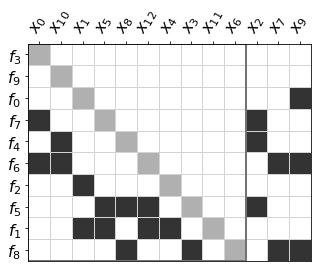

In [27]:
render_incidence(*formulation_scc_r, dsm=False);

In [25]:
ordered_edges, ordered_tree = formulation_scc_r
id_mapping = {var[0].varid: var[0] for key,var in var_mapping.items()}
newcomps = transform_components(edges, ordered_edges, comps, id_mapping)

# Run new structure

In [29]:
prob, mdao_in, groups = run_valid_formulation(ordered_edges, ordered_tree, comps+newcomps, dict(), dict(), dict(), default_nodetyperepr)

In [47]:
for invar in mdao_in:
    prob.set_val(var_mapping[invar][1], 1.0)

In [48]:
prob.run_model()


===
s_1
===
NL: Newton Converged in 0 iterations


In [65]:
print_vars_in_order(prob, edges_r, tree_r, var_mapping)

,0
x_9,1.000000
x_7,1.000000
x_2,1.000000
x_10,2.666667
x_6,-55.082920
x_5,5.250000
x_12,-1.460317
x_3,-0.141453
x_8,-0.958333
x_0,-0.333333
